In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

100%|██████████| 9912422/9912422 [00:24<00:00, 412129.63it/s] 


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 100666.31it/s]


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1922362.52it/s]


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



C:\self_download\miniconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\self_download\miniconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


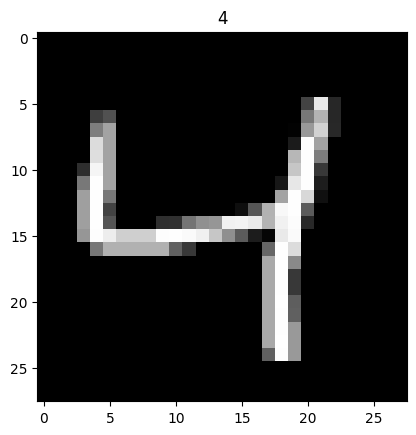

In [4]:
# hyper parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
DOWNLOAD_MNIST = True
N_TEST_IMG = 5

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,3),    # compress to 3 features which can be visualized in plt
        )
        self.decoder=nn.Sequential(
            nn.Linear(3,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid(),   # compress to a range (0, 1)
        )
    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return encoded,decoded



Epoch:  0 | train loss: 0.2311


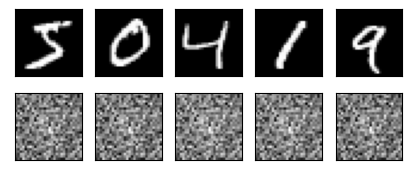

Epoch:  0 | train loss: 0.0633


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0689


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0668


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0609


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0599


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0568


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0511


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0509


<Figure size 640x480 with 0 Axes>

Epoch:  0 | train loss: 0.0526


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0526


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0493


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0447


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0411


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0402


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0455


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0393


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0416


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0393


<Figure size 640x480 with 0 Axes>

Epoch:  1 | train loss: 0.0356


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0370


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0405


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0442


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0386


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0377


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0405


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0396


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0426


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0370


<Figure size 640x480 with 0 Axes>

Epoch:  2 | train loss: 0.0396


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0404


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0436


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0392


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0398


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0397


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0390


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0395


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0393


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0333


<Figure size 640x480 with 0 Axes>

Epoch:  3 | train loss: 0.0373


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0407


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0389


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0411


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0375


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0355


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0380


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0365


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0363


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0388


<Figure size 640x480 with 0 Axes>

Epoch:  4 | train loss: 0.0403


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0378


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0352


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0386


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0365


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0358


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0360


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0354


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0356


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0402


<Figure size 640x480 with 0 Axes>

Epoch:  5 | train loss: 0.0353


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0372


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0358


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0377


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0369


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0397


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0406


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0361


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0386


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0375


<Figure size 640x480 with 0 Axes>

Epoch:  6 | train loss: 0.0372


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0378


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0342


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0358


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0357


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0379


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0353


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0383


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0360


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0371


<Figure size 640x480 with 0 Axes>

Epoch:  7 | train loss: 0.0355


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0366


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0348


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0372


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0361


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0315


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0352


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0387


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0372


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0372


<Figure size 640x480 with 0 Axes>

Epoch:  8 | train loss: 0.0353


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0352


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0344


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0327


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0355


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0357


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0318


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0335


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0323


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0391


<Figure size 640x480 with 0 Axes>

Epoch:  9 | train loss: 0.0367


<Figure size 640x480 with 0 Axes>

C:\Users\cong\AppData\Local\Temp\ipykernel_11708\4155625584.py:46: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  fig = plt.figure(2); ax = Axes3D(fig)


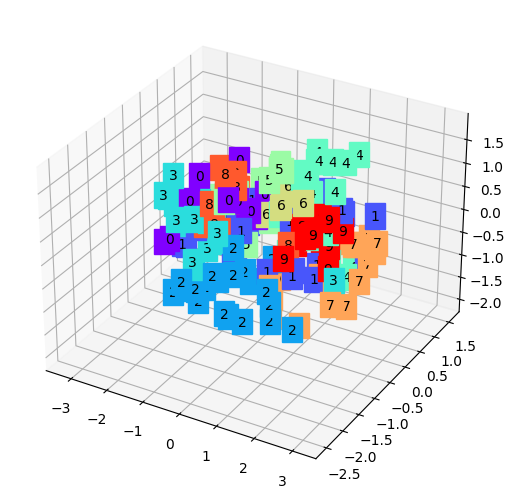

In [6]:
autoencoder=AutoEncoder()
optimizer=torch.optim.Adam(autoencoder.parameters(),lr=LR)
loss_func=nn.MSELoss()

#initialize figure
f,a=plt.subplots(2,N_TEST_IMG,figsize=(5,2))
plt.ion()

# original data (first row) for viewing
view_data=train_data.train_data[:N_TEST_IMG].view(-1,28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i],(28,28)),cmap='gray')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

for epoch in range(EPOCH):
    for step,(x,b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw()
            plt.pause(0.05)

plt.ioff()
plt.show()

# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()